# 이상치(Outlier) 처리
- 전체 데이터 분포에서 벗어난 극단적인 값

## 이상치 탐색 방법
- 박스플롯(Boxplot)
- IQR(Interquartile Range)

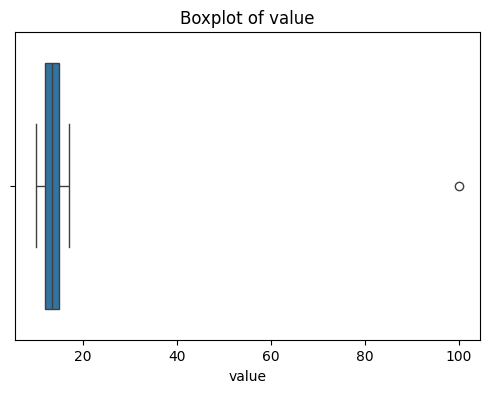

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예제 데이터프레임 생성
data = {'value': [10, 12, 12, 13, 12, 14, 15, 100, 12, 13, 14, 15, 16, 17]}
df = pd.DataFrame(data)

# seaborn 박스플롯 그리기
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['value'])
plt.title('Boxplot of value')
plt.show()


In [ ]:
# IQR 계산
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## 이상치 처리 방법
- 이상치 제거
- 이상치를 다른 값으로(예: 경계값)으로 변환
- 이상치를 별도로 분석용 태그 부여

In [4]:
import pandas as pd

data = {'value': [10, 12, 12, 13, 12, 14, 15, 100, 12, 13]}
df = pd.DataFrame(data)

# IQR 계산
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nIQR: {IQR}, lower_bound: {lower_bound}, upper_bound: {upper_bound}")

# 이상치 제거
df_outlier_removed = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

print("\n이상치 제거 후 데이터")
print(df_outlier_removed)


IQR: 1.75, lower_bound: 9.375, upper_bound: 16.375

이상치 제거 후 데이터
   value
0     10
1     12
2     12
3     13
4     12
5     14
6     15
8     12
9     13


# 결측치(Missing Value) 처리
- 데이터셋에서 값이 빠져있는 경우

## 결측치 탐색 방법
- isnull().sum()
- info()

In [7]:
import pandas as pd
import numpy as np

data = {'age': [25, np.nan, 30, 22, np.nan],
        'salary': [50000, 60000, np.nan, 52000, 58000]}
df = pd.DataFrame(data)

print(df.isnull().sum())

print("===============")

df.info()

age       2
salary    1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     3 non-null      float64
 1   salary  4 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes


## 결측치 처리 방법
- 제거(삭제)
- 대체(Imputation) : 평균, 중앙값, 최빈값 등으로 결측치를 채움

In [10]:
import pandas as pd
import numpy as np

data = {'age': [25, np.nan, 30, 22, np.nan],
        'salary': [50000, 60000, np.nan, 52000, 58000]}
df = pd.DataFrame(data)

# 1) 결측치 확인
print(df.isnull().sum())
df.info()

# 2) 결측치 삭제
df_drop = df.dropna()
print("\n결측치 있는 행 삭제")
print(df_drop)

# 3) 결측치 평균값으로 대체
df_fill = df.fillna(df.mean())
print("\n결측치 평균값으로 대체")
print(df_fill)

age       2
salary    1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     3 non-null      float64
 1   salary  4 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes

결측치 있는 행 삭제
    age   salary
0  25.0  50000.0
3  22.0  52000.0

결측치 평균값으로 대체
         age   salary
0  25.000000  50000.0
1  25.666667  60000.0
2  30.000000  55000.0
3  22.000000  52000.0
4  25.666667  58000.0


### 결측치 대체 방법
- 1) 특정 값으로 대체하기
- 2) 평균값으로 대체하기
- 3) 중앙값으로 대체하기
- 4) 이전 값 또는 다음 값으로 대체하기

In [ ]:
df.fillna(0)            # 모든 결측치를 0으로 대체
df.fillna(df.max())     # 각 컬럼별 최대값으로 대체
df.fillna(df.min())     # 각 컬럼별 최소값으로 대체

In [ ]:
df.fillna(df.mean())

In [ ]:
df.fillna(df.median())

In [ ]:
df.fillna(method='ffill')   # 이전 값으로 채우기 (forward fill)
df.fillna(method='bfill')   # 다음 값으로 채우기 (backward fill)

In [ ]:
# 그룹별 평균값으로 대체
## gender별로 그룹지어 그룹별 평균값으로 대체

df['age'].fillna(df.groupby('gender')['age'].transform(lambda x: x.fillna(x.mean())))

In [11]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'score': [90, np.nan, 85, np.nan, 95],
    'age': [20, 21, np.nan, 23, 24]
})

# 평균값으로 대체
df_mean = df.fillna(df.mean())

# 중앙값으로 대체
df_median = df.fillna(df.median())

print("원본\n", df)
print("평균값 대체\n", df_mean)
print("중앙값 대체\n", df_median)


원본
    score   age
0   90.0  20.0
1    NaN  21.0
2   85.0   NaN
3    NaN  23.0
4   95.0  24.0
평균값 대체
    score   age
0   90.0  20.0
1   90.0  21.0
2   85.0  22.0
3   90.0  23.0
4   95.0  24.0
중앙값 대체
    score   age
0   90.0  20.0
1   90.0  21.0
2   85.0  22.0
3   90.0  23.0
4   95.0  24.0
